###  Introduction:

<p>A census is the procedure of systematically acquiring and recording information about the members of a given population. The census is a special, wide-range activity, which takes place once a decade in the entire country. The purpose is to gather information about the general population, in order to present a full and reliable picture of the population in the country - its housing conditions and demographic, social and economic characteristics. The information collected includes data on age, gender, country of origin, marital status, housing conditions, marriage, education, employment, etc.

###  Data description
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). The prediction task is to determine whether a person makes over $50K a year.

###  Features Description

#### 1. Categorical Attributes

* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay,Never-worked.
  * Individual work category

* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th,   12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
     * Individual's highest education degree

* **marital-status:** Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouseabsent, Married-AF-spouse.
   * Individual marital status

* **occupation:** Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
  * Individual's occupation

* **relationship:** Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
     * Individual's relation in a family

* **race:** White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
  * Race of Individual

* **sex:** Female, Male.

* **native-country:** United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
  * Individual's native country

#### 2. Continuous Attributes

* **age:** continuous.
  * Age of an individual

* **fnlwgt:** final weight, continuous.
  The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional   population of the US. These are prepared monthly for us by Population Division here at the Census       Bureau.
  
* **capital-gain:** continuous.

* **capital-loss:** continuous.

* **hours-per-week:** continuous.
  * Individual's working hour per week

### Import Liberary

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [3]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from scipy import stats
from scipy.stats import mode

In [350]:
Data = pd.read_csv("adult.csv")

In [351]:
data = Data.copy()
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [352]:
print(data.isnull().sum())
print(data.shape)

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64
(48842, 15)


In [353]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [354]:
data.describe(include = 'object')

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


## Data Cleaning

#### Check how many ? in the data in each column

In [355]:
data.apply(lambda x:x=="?",axis=0).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

### Lets see the percentage of ? in these column

In [356]:
col_names = data.columns
num_data = data.shape[0]
for c in col_names:
    num_non = data[c].isin(["?"]).sum()
    if num_non > 0:
        print (c) 
        print (num_non)
        print ("{0:.2f}%".format(float(num_non) / num_data * 100)) 
        print ("\n")

workclass
2799
5.73%


occupation
2809
5.75%


native-country
857
1.75%




#### Its really high enough to not drop, so i will going to impute  

In [357]:
data['workclass'] = data['workclass'].replace('?', np.NaN)
data['occupation'] = data['occupation'].replace('?', np.NaN)
data['native-country'] = data['native-country'].replace('?', np.NaN)

In [358]:
data['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [359]:
data['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [360]:
data['native-country'].value_counts()

United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru                             46
Ecuador                     

In [361]:
data['workclass']=data['workclass'].fillna(data['workclass'].mode()[0])
data['occupation']=data['occupation'].fillna(data['occupation'].mode()[0])
data['native-country']=data['native-country'].fillna(data['native-country'].mode()[0])

In [362]:
data.shape

(48842, 15)

In [363]:
inc = {'<=50K':0, '>50K':1}
data["income"].replace(inc, inplace=True)

In [364]:
# list of numerical variables
num_feat = [feature for feature in data.columns if data[feature].dtypes != 'O']
print('Number of numerical variables: ', len(num_feat))
data[num_feat].head(2)

Number of numerical variables:  7


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
0,25,226802,7,0,0,40,0
1,38,89814,9,0,0,50,0


In [365]:
# list of Catagorical variables
cat_feat = [feature for feature in data.columns if data[feature].dtypes == 'O']
print('Number of catagorical variables: ', len(cat_feat))
data[cat_feat].head(2)

Number of catagorical variables:  8


,workclass,education,marital-status,occupation,relationship,race,gender,native-country
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States


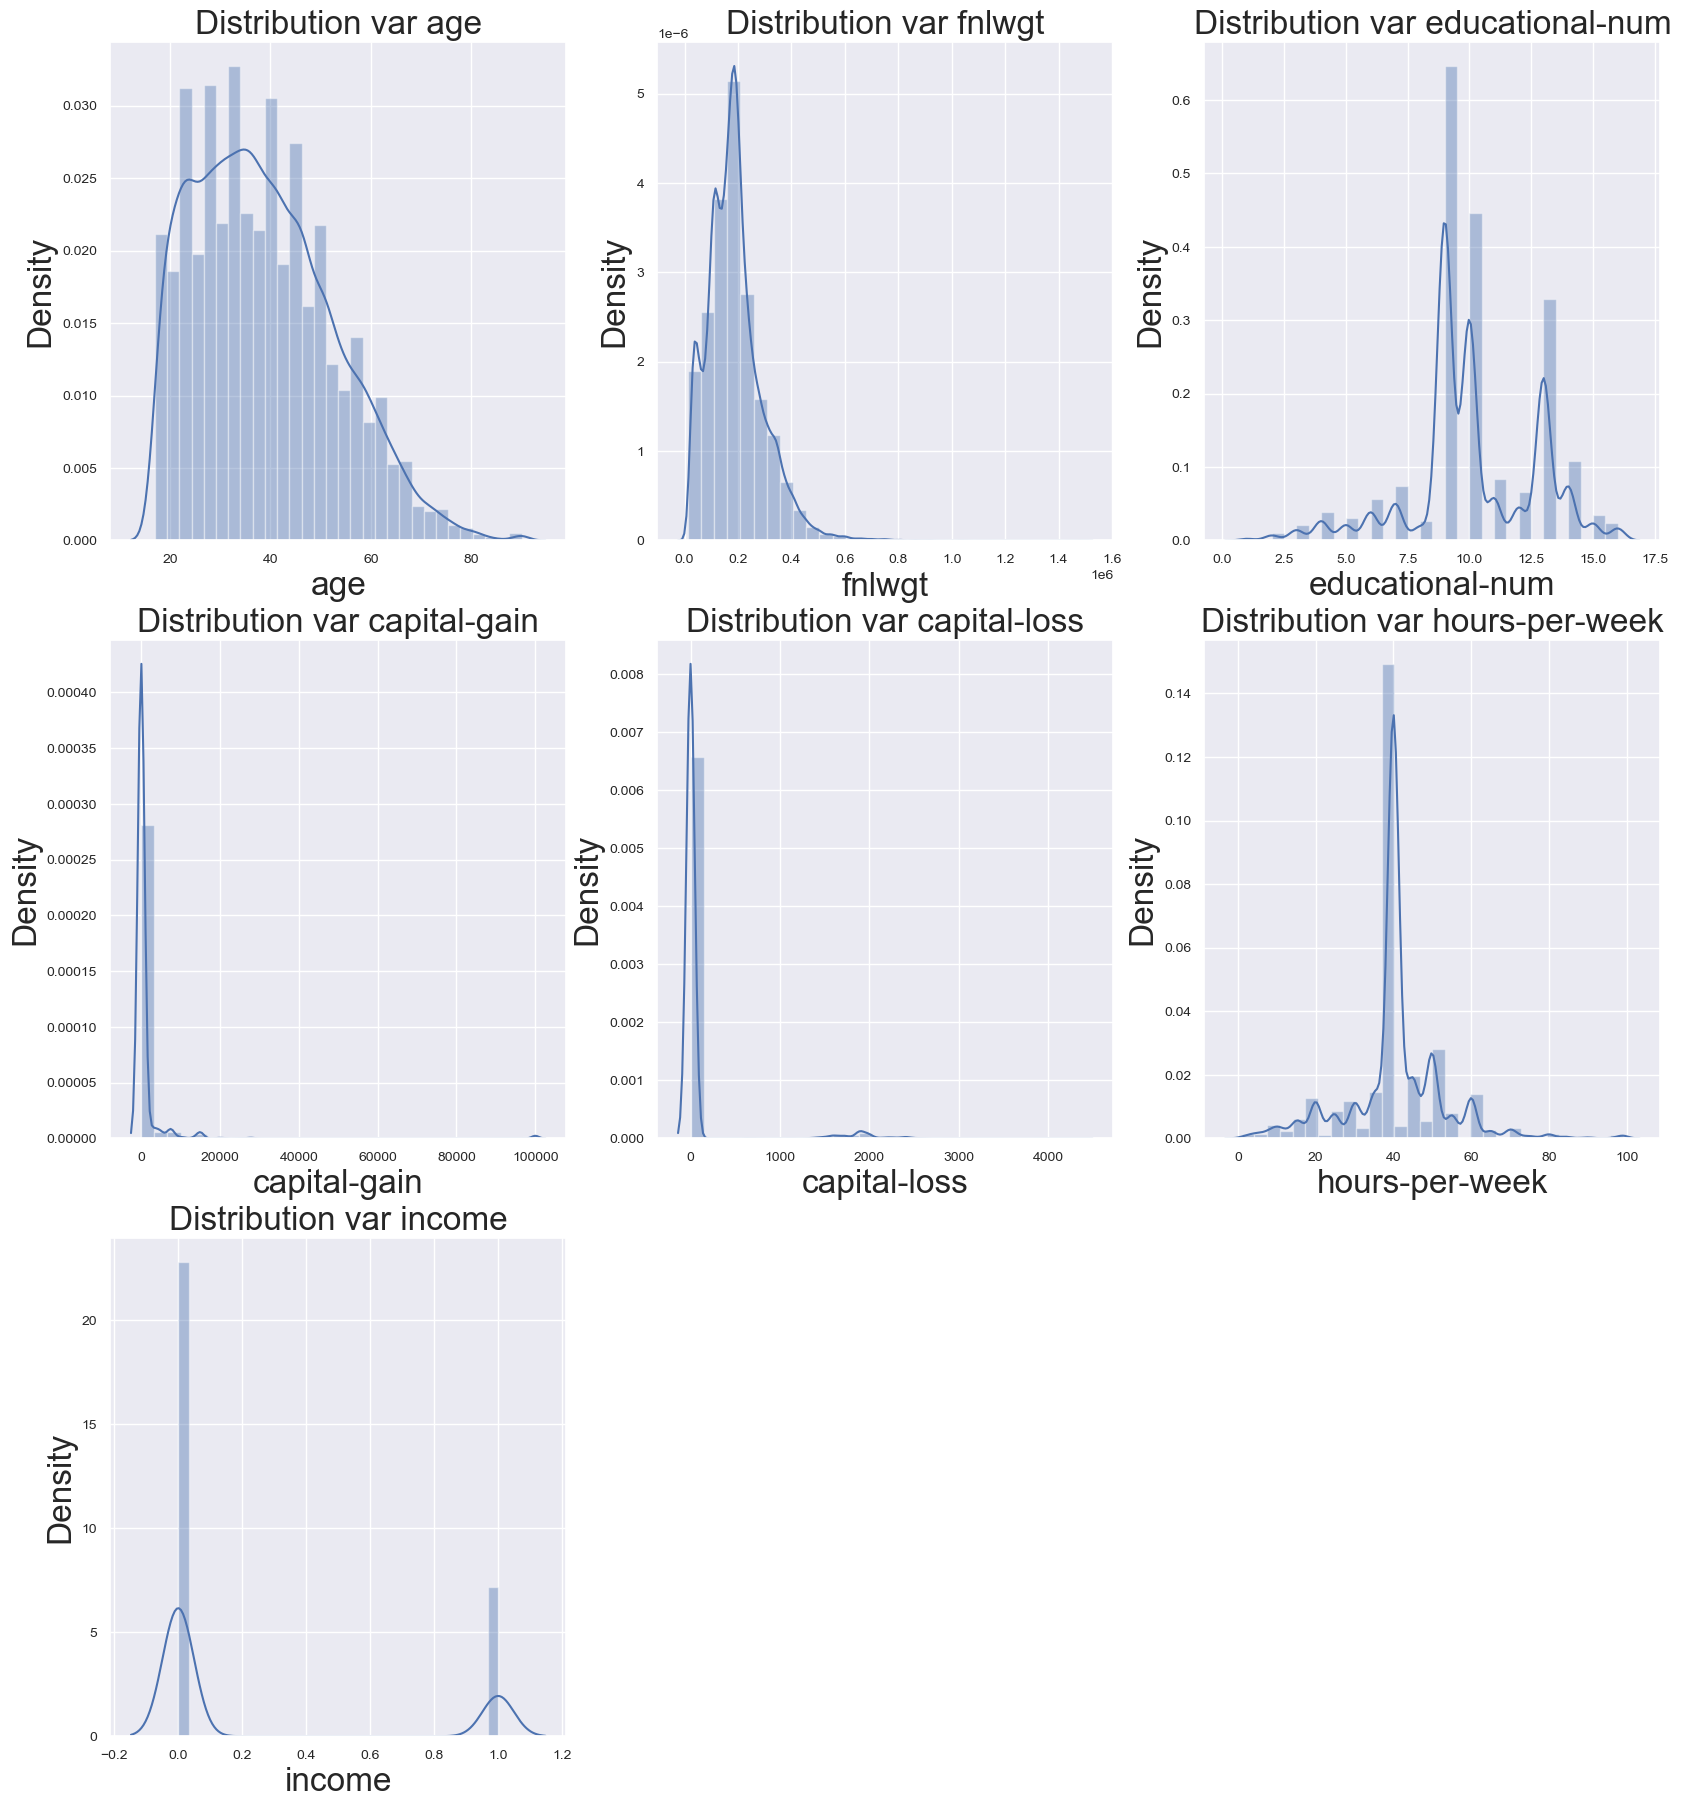

In [370]:
plt.figure(figsize=(20,22))
n = 0
plt.rc('ytick', labelsize=10)
plt.rc('xtick', labelsize=10)
for i, column in enumerate(data[num_feat].columns):
    n+=1
    plt.subplot(3, 3, n)
    sns.distplot(data[num_feat][column], bins=30)
    plt.title('Distribution var {}'.format(column))
plt.show()

### Lets see the Outliers

BoxPlots of the features:


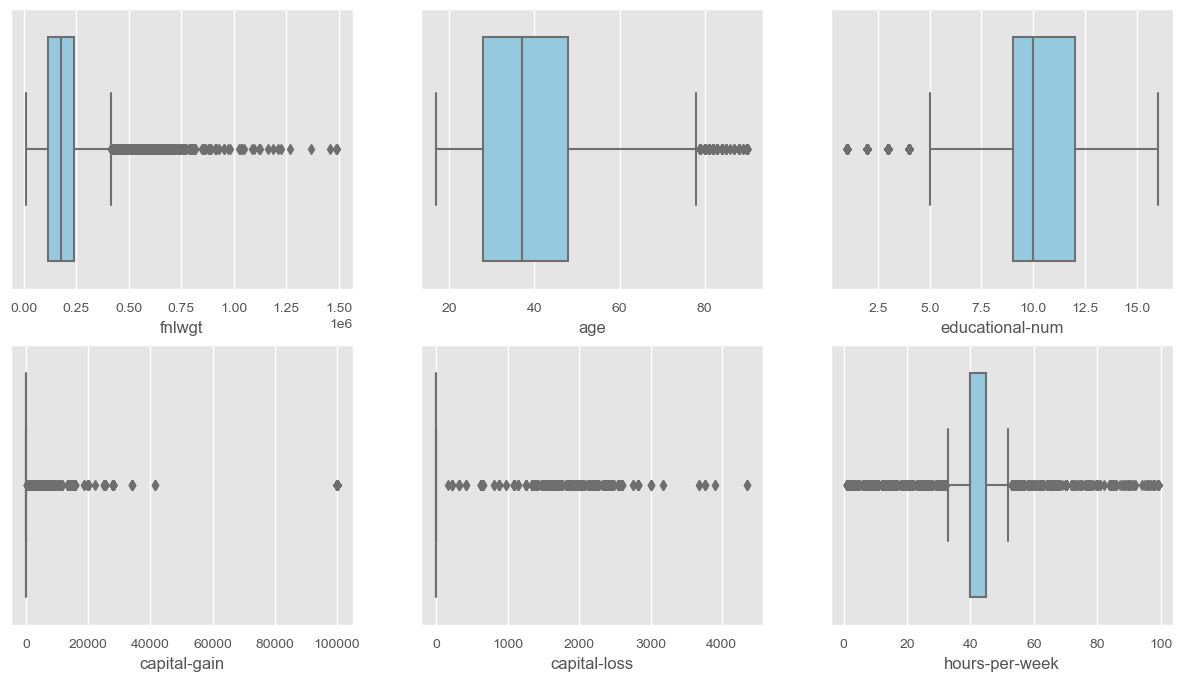

In [371]:
plt.style.use('ggplot')
blist = ['fnlwgt','age','educational-num','capital-gain','capital-loss','hours-per-week']
plt.figure(figsize = (15,8))
for i in range(0, len(blist)):
    plt.subplot(2,3, i+1)
    sns.boxplot(data[blist[i]], color = 'skyblue')
print("BoxPlots of the features:")
plt.show()

### Let's the relationship

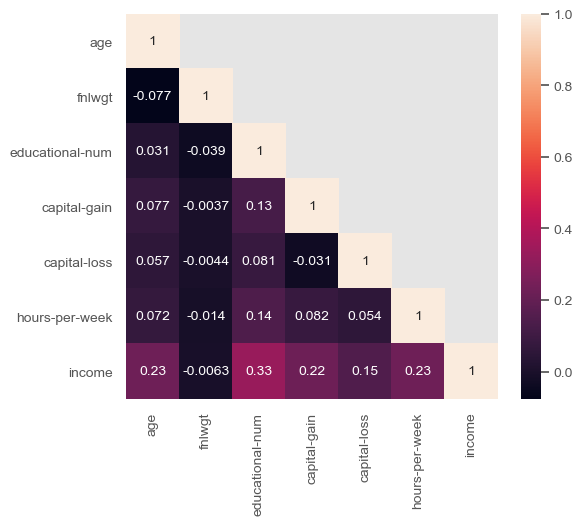

In [372]:
plt.figure(figsize =(6,5))
mask = np.array(data[num_feat].corr())
mask[np.tril_indices_from(mask)]=False
sns.heatmap(data[num_feat].corr(), mask = mask, annot =True)
plt.show()

In [373]:
data.drop(['fnlwgt', 'educational-num'], axis = 1, inplace = True)

In [374]:
data.head()

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,Private,Some-college,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,0


Lambda value used for Transformation: 0.17478286528476536


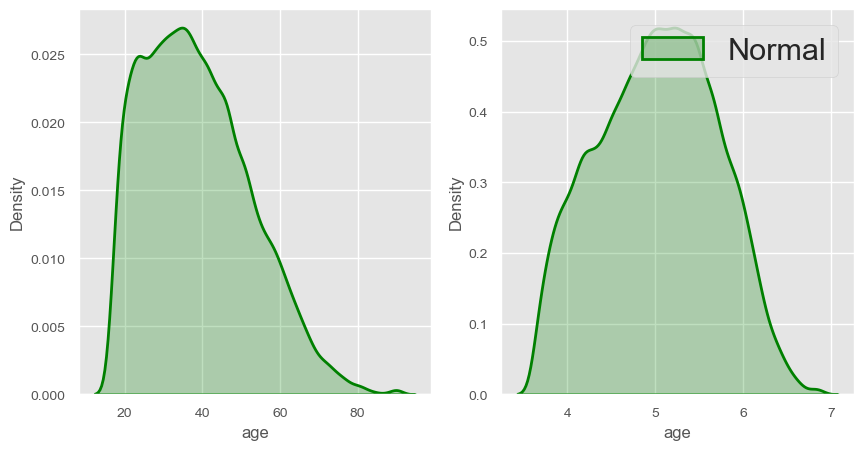

In [375]:
# transform training data & save lambda value
data['age'], fitted_lambda = stats.boxcox(data['age'])
  
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
  
# plotting the original data(non-normal) and 
# fitted data (normal)
sns.distplot(Data['age'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green", ax = ax[0])
  
sns.distplot(data['age'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green", ax = ax[1])
  
# adding legends to the subplots
plt.legend(loc = "upper right")
  
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
  
print(f"Lambda value used for Transformation: {fitted_lambda}")

BoxPlots of the features:


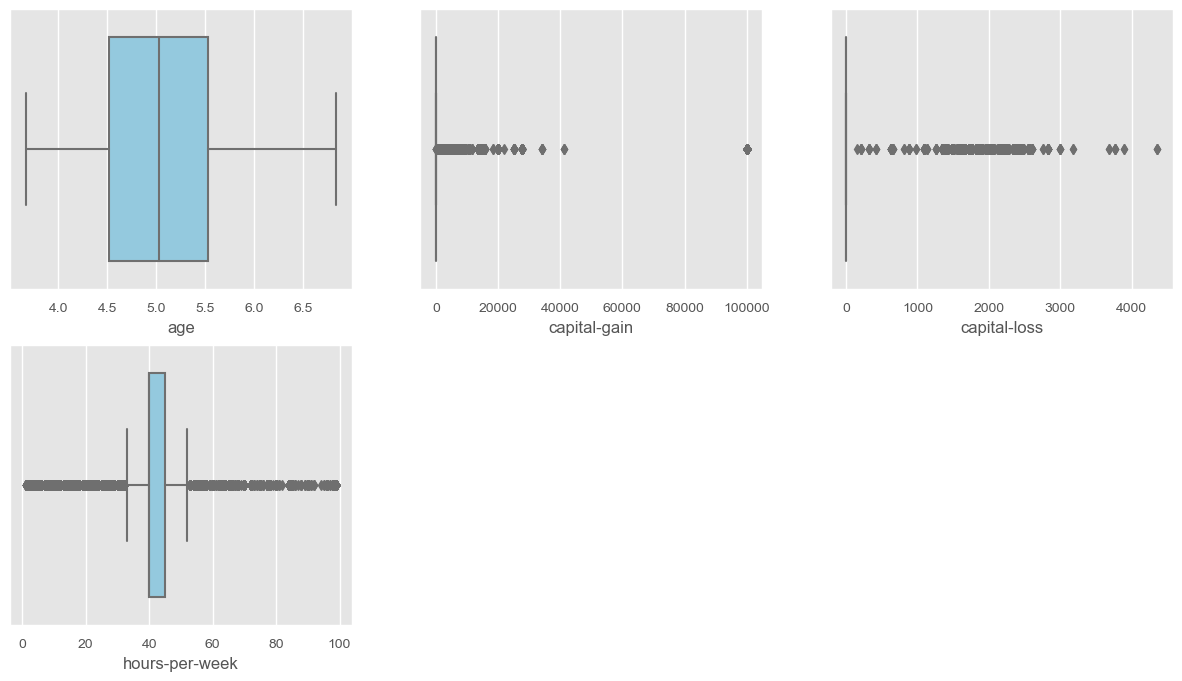

In [378]:
plt.style.use('ggplot')
blist = ['age','capital-gain','capital-loss','hours-per-week']
plt.figure(figsize = (15,8))
for i in range(0, len(blist)):
    plt.subplot(2,3, i+1)
    sns.boxplot(data[blist[i]], color = 'skyblue')
print("BoxPlots of the features:")
plt.show()

In [379]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data[blist]))
print(z)

[[1.02833234 0.14480353 0.2171271  0.03408696]
 [0.09938001 0.14480353 0.2171271  0.77292975]
 [0.73120381 0.14480353 0.2171271  0.03408696]
 ...
 [1.32518243 0.14480353 0.2171271  0.03408696]
 [1.35650146 0.14480353 0.2171271  1.64812038]
 [0.99990112 1.87131501 0.2171271  0.03408696]]


In [380]:
threshold = 3
np.where(z > 3)

(array([   25,    52,    82, ..., 48799, 48806, 48812], dtype=int64),
 array([3, 2, 2, ..., 1, 3, 3], dtype=int64))

In [381]:
data = data[(z < 3).all(axis=1)]
print(data.shape)

(45660, 13)


### EDA 

### Income of people according to their occupation

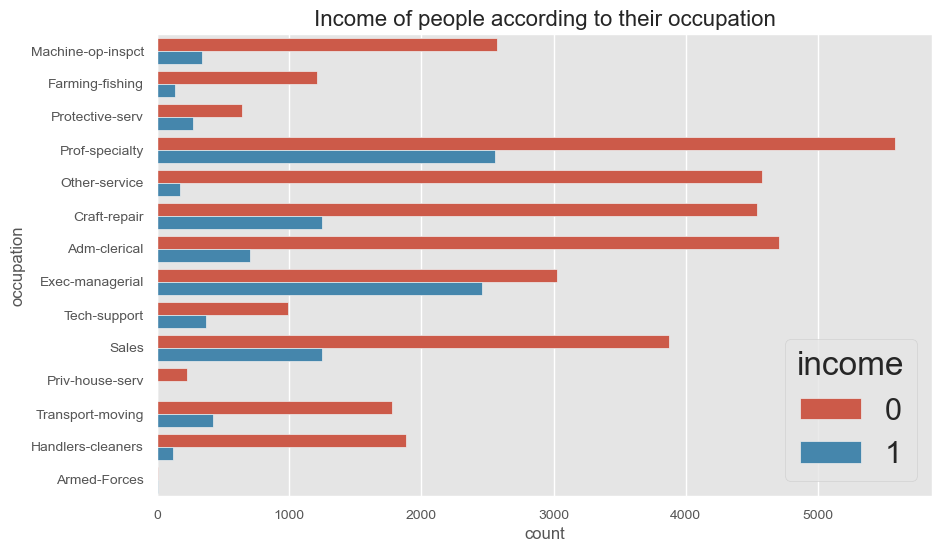

In [382]:
plt.style.use('ggplot')
plt.figure(figsize = (10,6))
plt.title("Income of people according to their occupation", fontsize = 16)
sns.countplot(y = data['occupation'], hue = data['income'])
plt.show()

### "Income of people according to their native country"

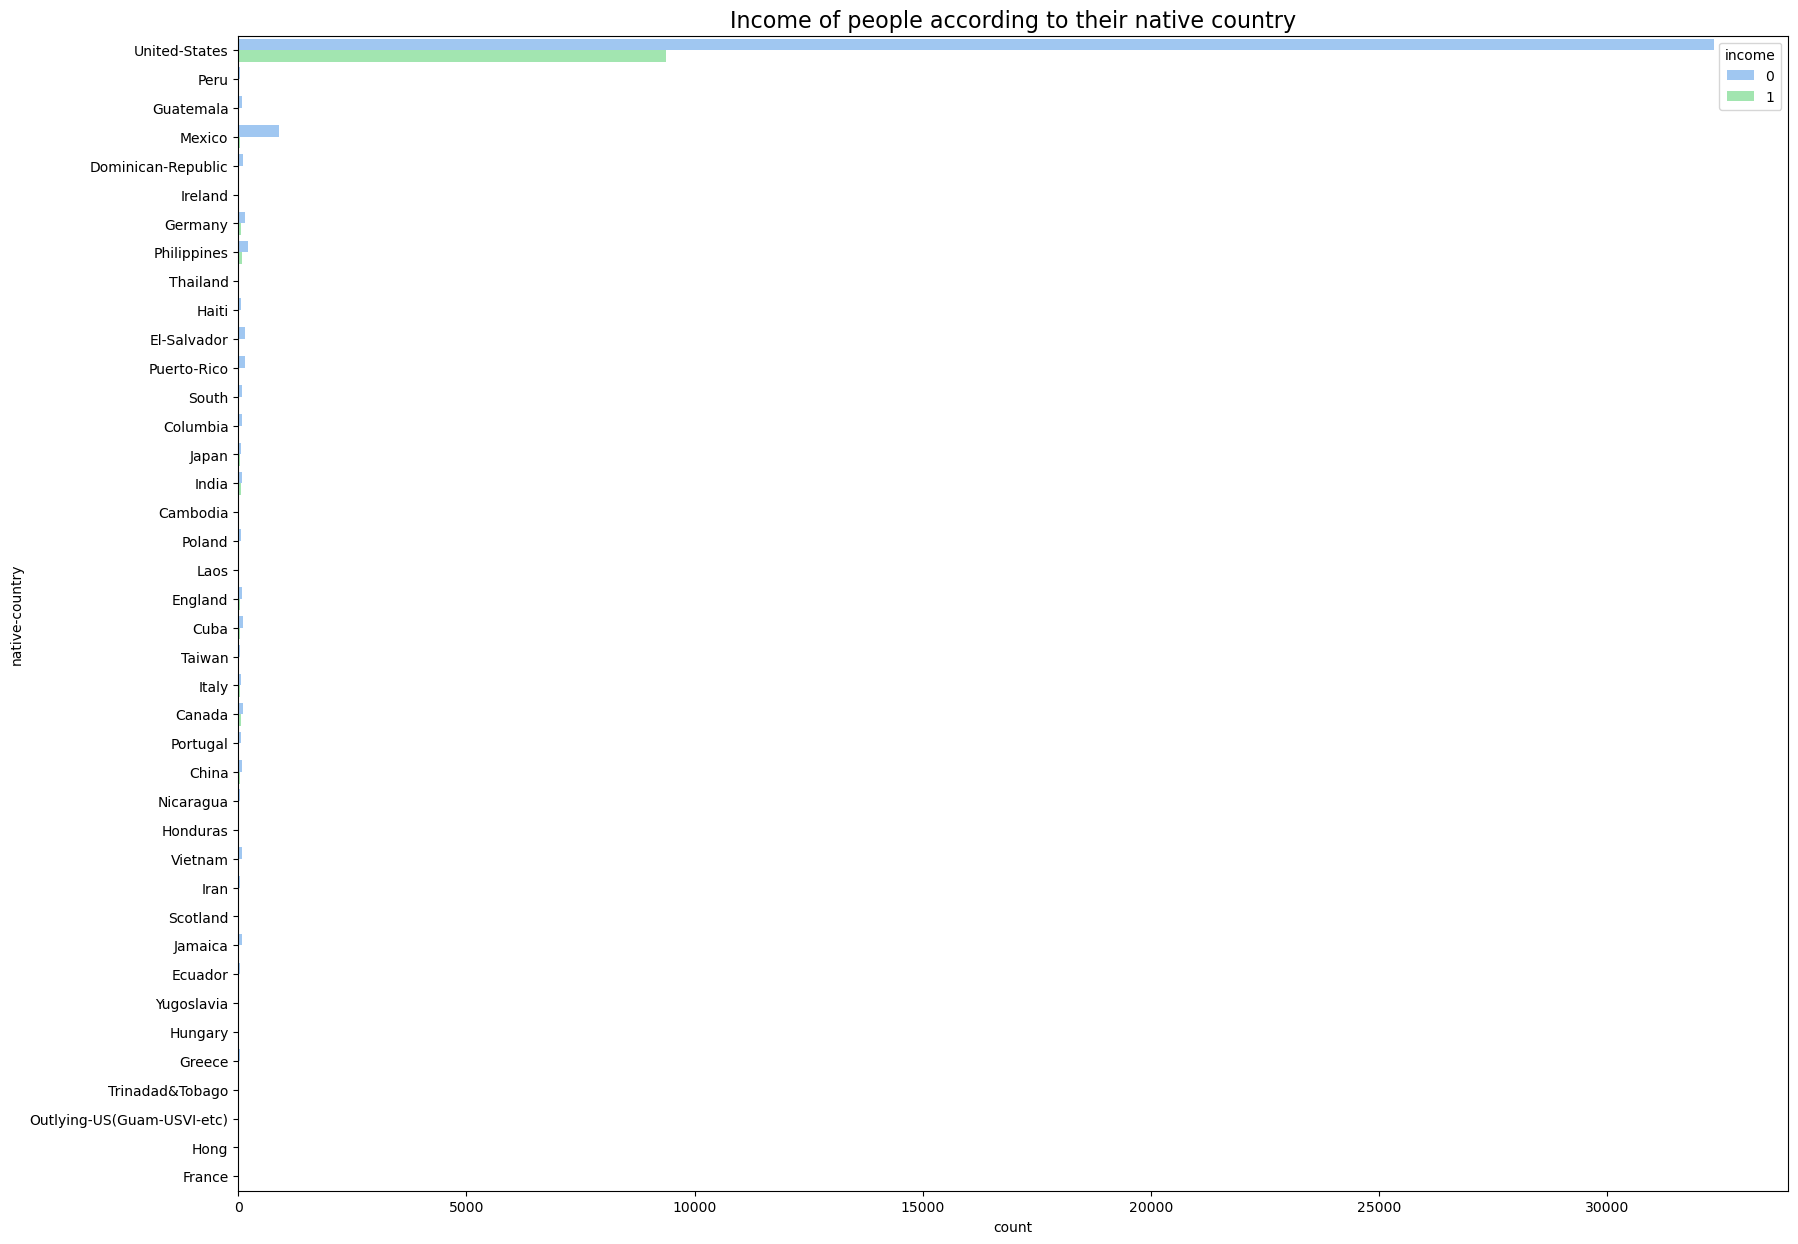

In [383]:
plt.style.use('default')
plt.style.use('seaborn-pastel')
plt.figure(figsize = (20,15))
plt.title("Income of people according to their native country", fontsize = 16)
sns.countplot(y = data['native-country'], hue = data['income'])
plt.show()

In [384]:
 data['native-country'].value_counts()

United-States                 41722
Mexico                          927
Philippines                     275
Germany                         199
Puerto-Rico                     175
Canada                          169
El-Salvador                     151
India                           137
Cuba                            132
England                         118
China                           108
Jamaica                         104
South                           103
Dominican-Republic               99
Italy                            99
Guatemala                        87
Japan                            85
Poland                           83
Columbia                         80
Vietnam                          80
Haiti                            72
Portugal                         66
Taiwan                           58
Iran                             54
Nicaragua                        47
Peru                             45
Ecuador                          45
Greece                      

In [385]:
data[data['native-country'].map(data['native-country'].value_counts()) < 100]

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
23,4.321006,Private,Bachelors,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,43,Peru,0
37,4.099116,Private,5th-6th,Never-married,Priv-house-serv,Not-in-family,White,Male,0,0,50,Guatemala,0
74,5.450404,Private,Some-college,Married-civ-spouse,Craft-repair,Husband,Other,Male,0,0,40,Dominican-Republic,0
128,4.457003,Self-emp-not-inc,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,Ireland,1
232,5.804831,Private,Masters,Never-married,Exec-managerial,Unmarried,Asian-Pac-Islander,Female,0,0,50,Thailand,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48684,5.533818,Private,1st-4th,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,Portugal,0
48737,4.646177,Self-emp-not-inc,11th,Married-spouse-absent,Craft-repair,Not-in-family,White,Male,0,0,30,Honduras,0
48789,5.407570,Private,10th,Divorced,Other-service,Not-in-family,Black,Female,0,0,38,Dominican-Republic,0
48814,5.767924,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,50,Japan,1


In [386]:
data['native-country'] = np.where(data['native-country'].str.contains("United-States"), "United-States", "Other")
data['native-country'].value_counts()

United-States    41722
Other             3938
Name: native-country, dtype: int64

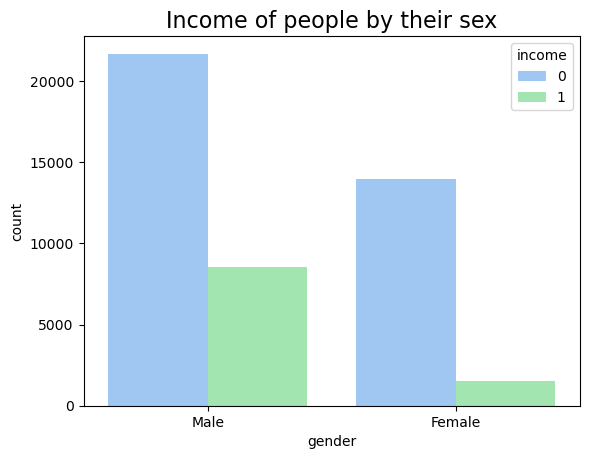

In [387]:
plt.title("Income of people by their sex", fontsize = 16)
sns.countplot(x = data['gender'], hue = data['income'])
plt.show()

In [388]:
data['gender'] = data['gender'].map({'Male':0,'Female':1})

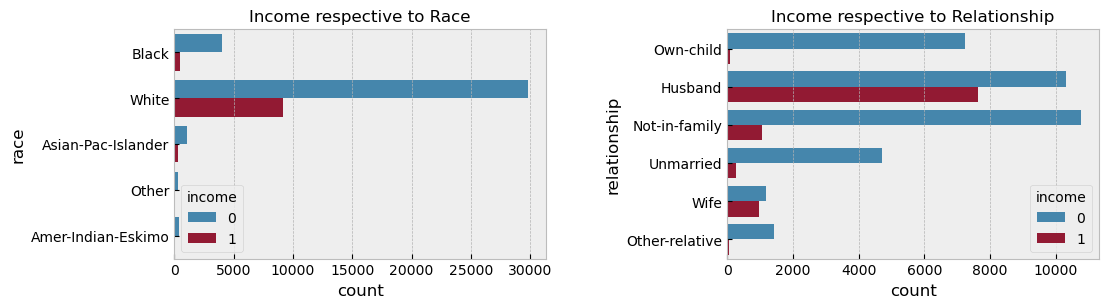

In [389]:
plt.style.use('bmh')
plt.figure(figsize = (12,4))

plt.subplot(1, 2, 1)
sns.countplot(y = data['race'], hue = data['income'])
plt.title("Income respective to Race", fontsize = 12)

plt.subplot(1, 2, 2)
sns.countplot(y = data['relationship'], hue = data['income'])
plt.title("Income respective to Relationship", fontsize = 12)

plt.tight_layout(pad = 4)
plt.show()

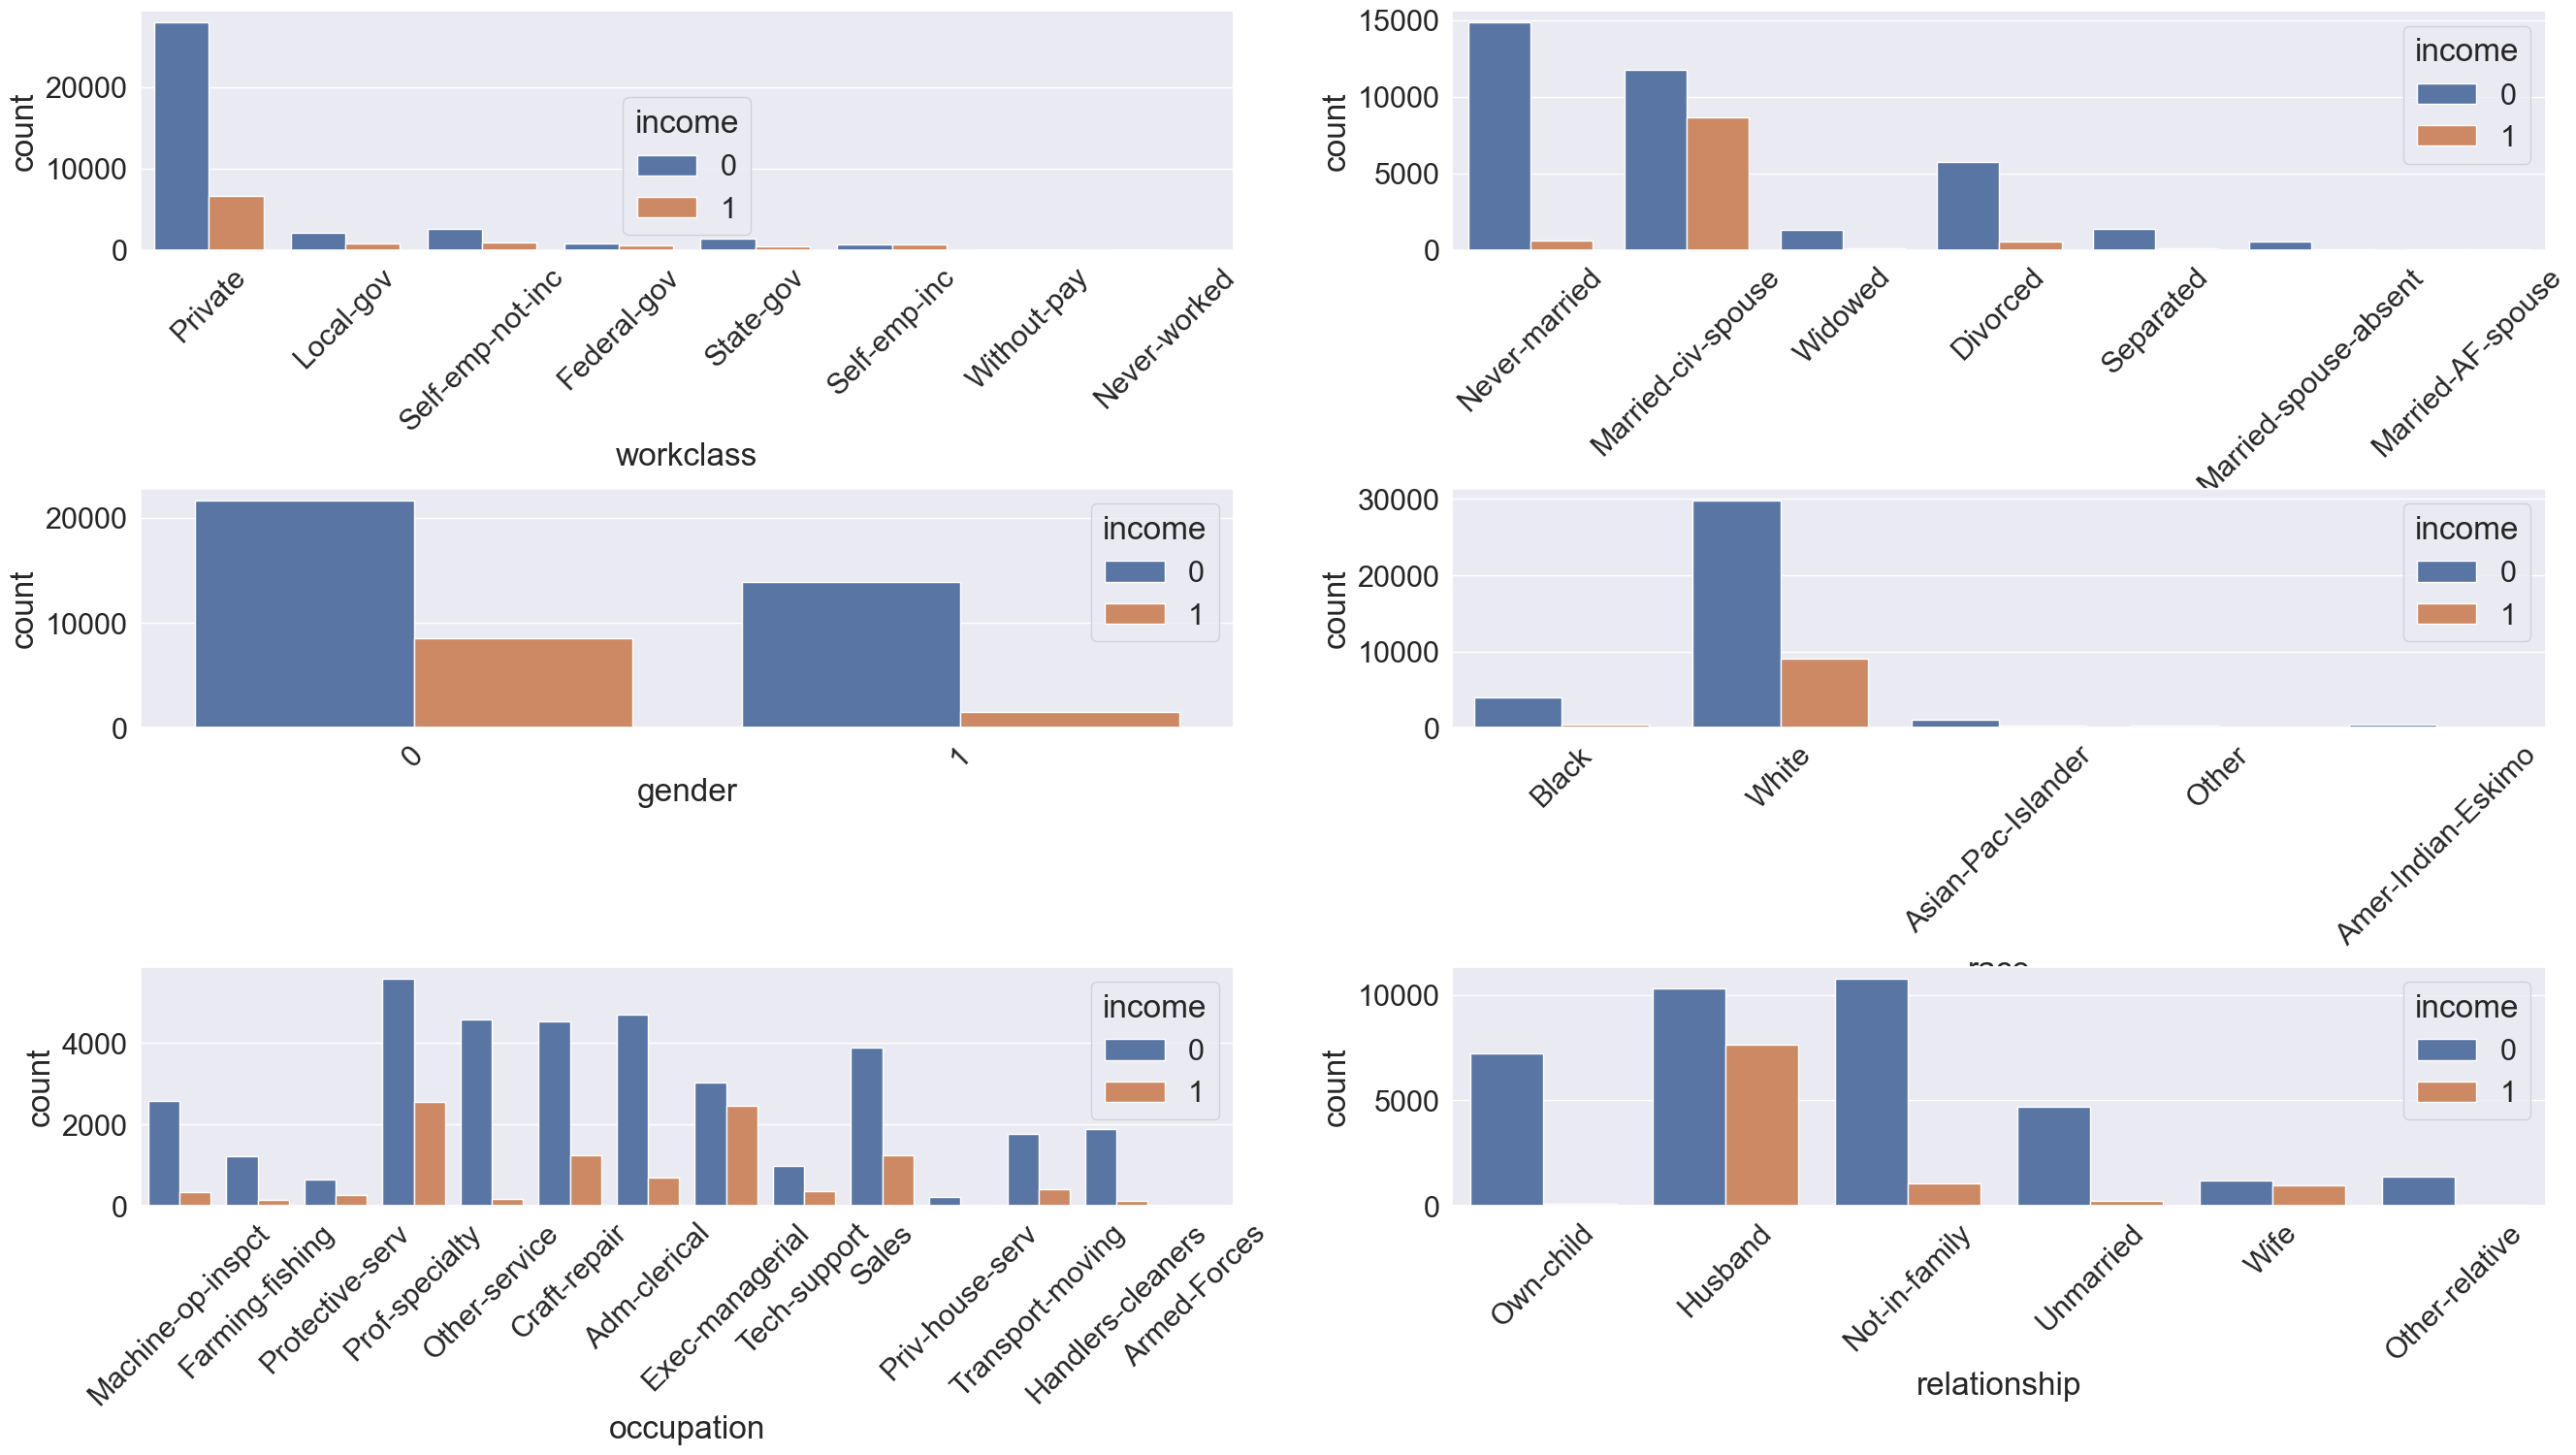

In [390]:
sns.set(font_scale=2)
plt.figure(figsize=(32,16)) 

plt.subplot(321)
sns.countplot(x="workclass",hue="income",data=data)
plt.xticks(rotation=45) 

plt.subplot(322)
sns.countplot(x="marital-status",hue="income",data=data)
plt.xticks(rotation=45)

plt.subplot(323)
sns.countplot(x="gender",hue="income",data=data)
plt.xticks(rotation=45)

plt.subplot(324)
sns.countplot(x="race",hue="income",data=data)
plt.xticks(rotation=45)

plt.subplot(325)
sns.countplot(x="occupation",hue="income",data=data)
plt.xticks(rotation=45)


plt.subplot(326)
sns.countplot(x="relationship",hue="income",data=data)
plt.xticks(rotation=45)


plt.subplots_adjust(hspace=1) 
plt.show()

In [392]:
data['marital-status'] = data['marital-status'].replace({"Never-married":"NotMarried","Divorced":"Separated","Separated":"Separated",
                                                     "Widowed":"Widowed","Married-spouse-absent":"NotMarried",
                                                     "Married-civ-spouse":"Married","Married-AF-spouse":"Married"})

data["workclass"] = data["workclass"].replace({"Private":"Paid_Employed","Self-emp-not-inc":"Paid_Employed",
                                           "Local-gov":"Paid_Employed","unknown":"Paid_Employed",
                                           "State-gov":"Paid_Employed","Self-emp-inc":"Paid_Employed",
                                           "Federal-gov":"Paid_Employed","Without-pay":"Unpaid_Employed",
                                           "Never-worked":"UnEmployed",})

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

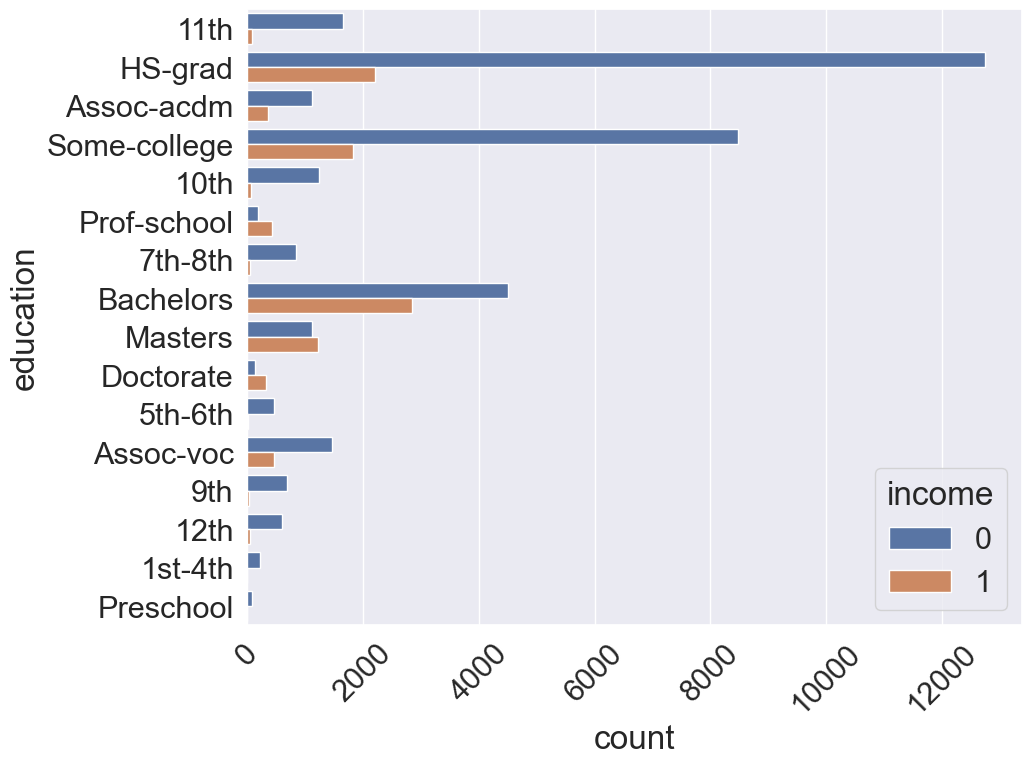

In [393]:
plt.figure(figsize=(10,8))
sns.countplot(y="education",hue="income",data=data)
plt.xticks(rotation=45) 

In [394]:
data['education'] = data['education'].replace({'Preschool':'Not-grad','1st-4th':'Not-grad','5th-6th':'Not-grad',
                                           '7th-8th':'Not-grad','9th':'Not-grad','10th':'Not-grad',
                                           '11th':'Not-grad','12th':'Not-grad',})

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

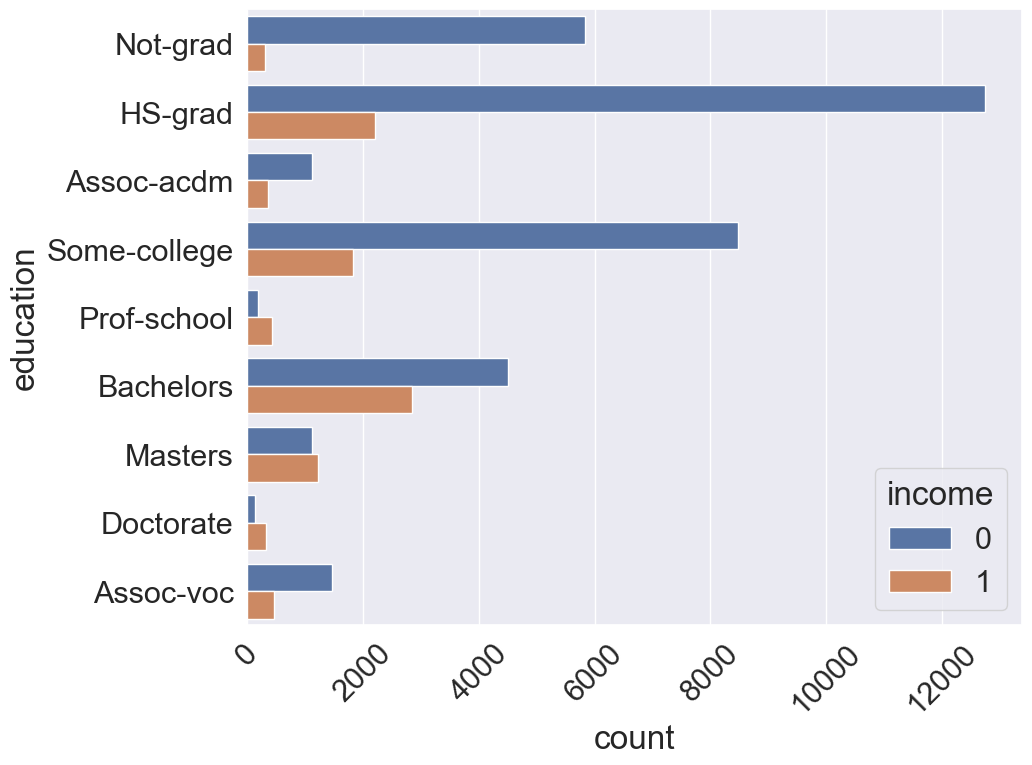

In [395]:
plt.figure(figsize=(10,8))
sns.countplot(y="education",hue="income",data=data)
plt.xticks(rotation=45) 

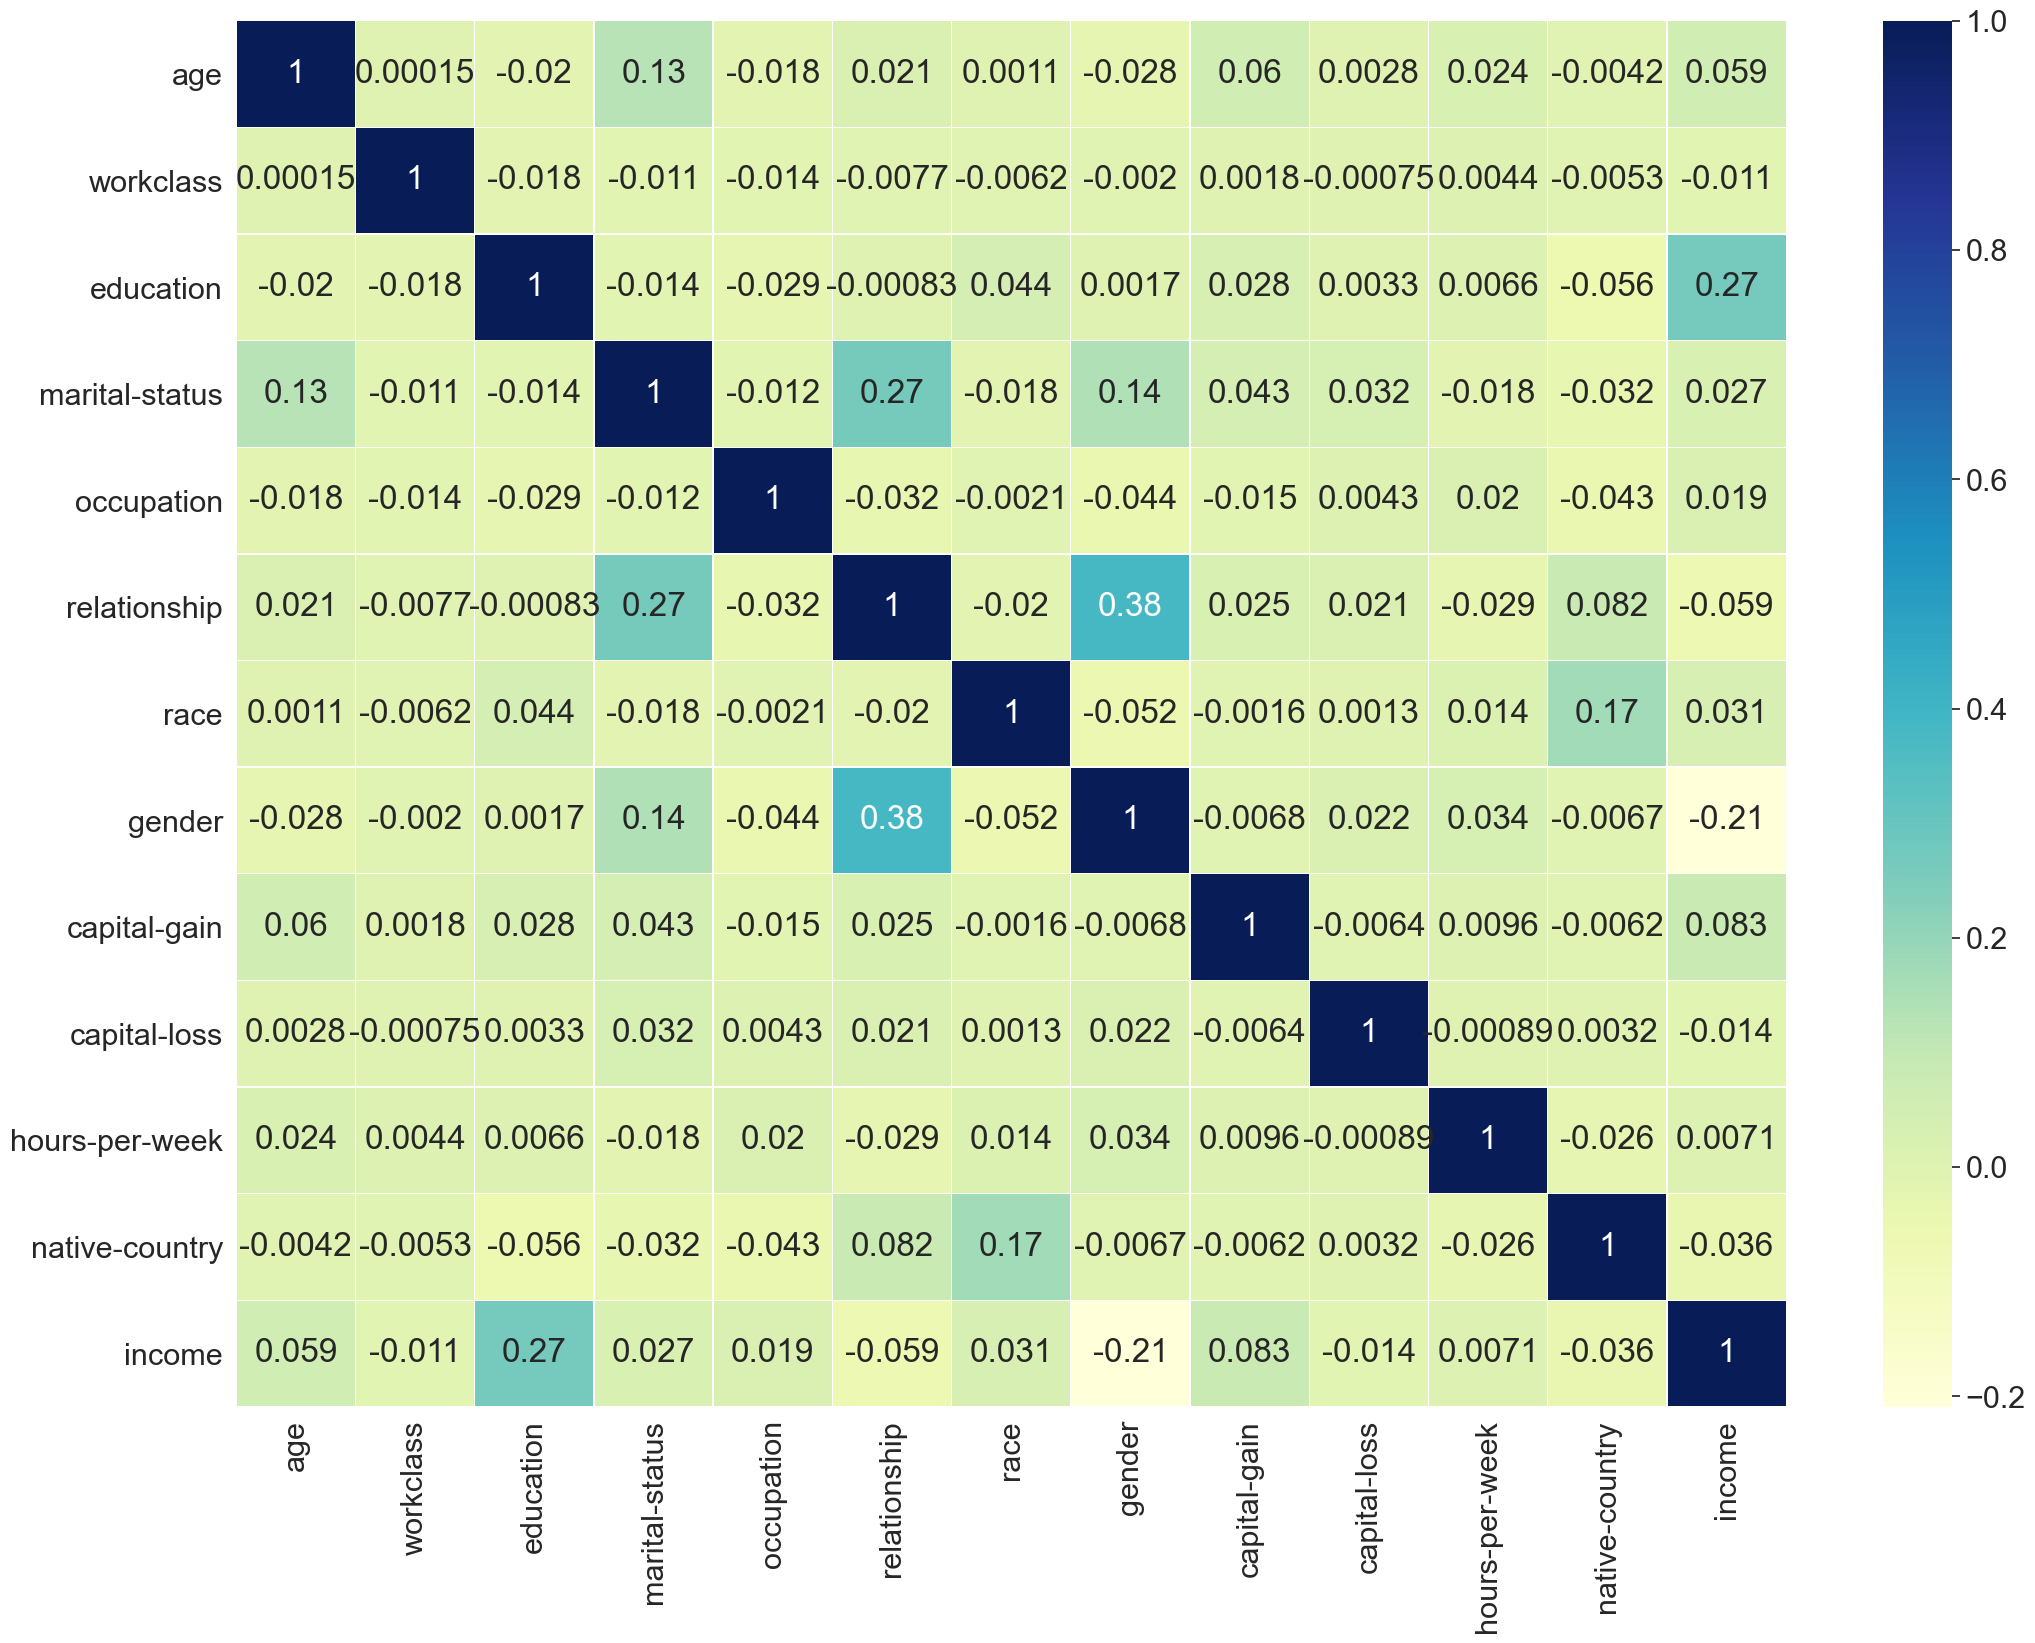

In [396]:
plt.figure(figsize=(25, 18))
mask = np.array(data.corr())
mask[np.tril_indices_from(mask)]=False
#df1 = data.drop('income',axis=1)
corr = data.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, annot=True,yticklabels=corr.columns, 
                 linewidths=.2,cmap="YlGnBu")

### Scaling

In [398]:
cat_feat = data.select_dtypes(include='O').columns
df_dummies= pd.get_dummies(data[cat_feat],  drop_first=True)

In [411]:

df_dummies.max(axis = 0)

workclass_UnEmployed            1
workclass_Unpaid_Employed       1
education_Assoc-voc             1
education_Bachelors             1
education_Doctorate             1
education_HS-grad               1
education_Masters               1
education_Not-grad              1
education_Prof-school           1
education_Some-college          1
marital-status_NotMarried       1
marital-status_Separated        1
marital-status_Widowed          1
occupation_Armed-Forces         1
occupation_Craft-repair         1
occupation_Exec-managerial      1
occupation_Farming-fishing      1
occupation_Handlers-cleaners    1
occupation_Machine-op-inspct    1
occupation_Other-service        1
occupation_Priv-house-serv      1
occupation_Prof-specialty       1
occupation_Protective-serv      1
occupation_Sales                1
occupation_Tech-support         1
occupation_Transport-moving     1
relationship_Not-in-family      1
relationship_Other-relative     1
relationship_Own-child          1
relationship_U

In [406]:
data = data.drop(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'native-country'], axis = 1)
data = pd.concat([data, df_dummies], axis = 1)

In [407]:
data.head(2)

,age,gender,capital-gain,capital-loss,hours-per-week,income,workclass_UnEmployed,workclass_Unpaid_Employed,education_Assoc-voc,education_Bachelors,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,native-country_United-States
0,4.321006,0,0,0,40,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
1,5.083503,0,0,0,50,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [413]:
x=data.drop(['income'],axis=1)
y=data['income']

In [414]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
x = scale.fit_transform(x)
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0.206210,0.0,0.00000,0.0,0.493151,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.446402,0.0,0.00000,0.0,0.630137,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.269495,0.0,0.00000,0.0,0.493151,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.534742,0.0,0.34882,0.0,0.493151,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.029692,1.0,0.00000,0.0,0.356164,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45655,0.249050,1.0,0.00000,0.0,0.465753,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
45656,0.477053,0.0,0.00000,0.0,0.493151,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
45657,0.707486,1.0,0.00000,0.0,0.493151,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
45658,0.136313,0.0,0.00000,0.0,0.219178,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


<AxesSubplot:xlabel='income', ylabel='count'>

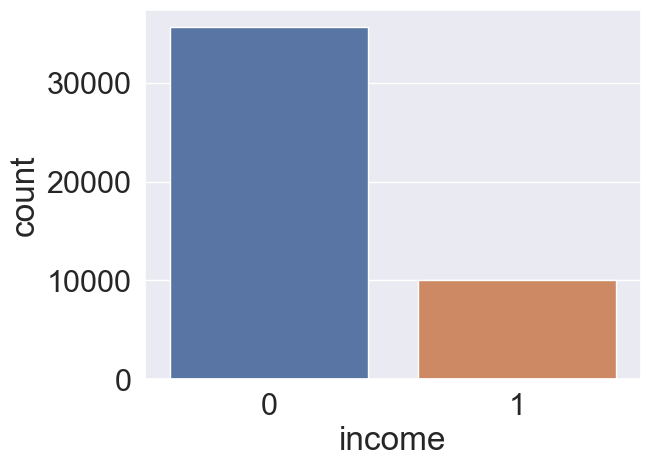

In [415]:
sns.countplot(y)

#### Now you can see here that is so unbalance 

### To balance the data we can use SMOTE

In [416]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek()

In [417]:
x_new, y_new = smk.fit_resample(x,y)

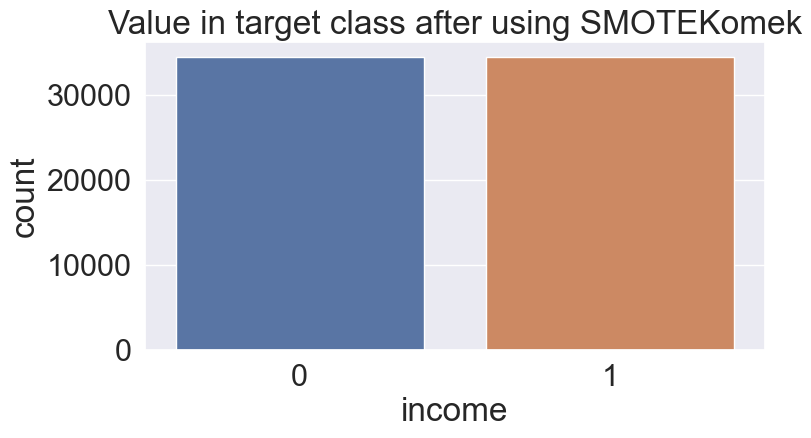

In [418]:
plt.figure(figsize = (8, 4))
plt.title('Value in target class after using SMOTEKomek')
sns.countplot(x = y_new)
plt.show()

### Machine Learning

In [419]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.2)

In [420]:
lg = LogisticRegression()
lg.fit(x_train, y_train)
pred_lg = lg.predict(x_test)
print("Accuracy Score of Logistic Regression model in train is", accuracy_score(y_test, pred_lg)*100)
pred_y = lg.predict(x_train)
print("Accuracy Score of Logistic Regression model in test is ", accuracy_score(y_train, pred_y)*100)  
print("...........\n")
# For Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
pred_dtc = dtc.predict(x_test)
print("Accuracy Score of Decision Tree Classifier model in test is", accuracy_score(y_test, pred_dtc)*100)
pred_dtc_train = dtc.predict(x_train)
print("Accuracy Score of Decision Tree Classifier model in train is", accuracy_score(y_train, pred_dtc_train)*100)
print("............\n")
# For K-Nearest Neighbour Classifier
knc = KNeighborsClassifier(n_neighbors = 5)
knc.fit(x_train, y_train)
pred_knc = knc.predict(x_test)
print("Accuracy Score of K-Nearest Neighbour Classifier model in test is", accuracy_score(y_test, pred_knc)*100)
pred_knc_train = knc.predict(x_train)
print("Accuracy Score of K-Nearest Neighbour Classifier model in train is", accuracy_score(y_train, pred_knc_train)*100)
print(".............\n")


#For Gradient boosting Classifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
pred_gbc = gbc.predict(x_test)
print("Accuracy Score of Gradient Boosting Classifier model in test is", accuracy_score(y_test, pred_gbc)*100)
pred_gbc_train = gbc.predict(x_train)
print("Accuracy Score of Gradient Boosting Classifier model in train is", accuracy_score(y_train, pred_gbc_train)*100)
print(".............\n")

# For Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
pred_rfc = rfc.predict(x_test)
print("Accuracy Score of Random Forest model in test is", accuracy_score(y_test, pred_rfc)*100)
pred_rfc_train = rfc.predict(x_train)
print("Accuracy Score of Random Forest model in train is", accuracy_score(y_train, pred_rfc_train)*100)
print(".............\n")


# For ADA Boost Classifier
ada= AdaBoostClassifier()
ada.fit(x_train, y_train) # fitting the model
pred_ada = ada.predict(x_test) # predicting the values
print("Accuracy Score of ADA Boost model in test is", accuracy_score(y_test, pred_ada)*100)
pred_ada_train = ada.predict(x_train)
print("Accuracy Score of ADA Boost model in train is", accuracy_score(y_train, pred_ada_train)*100)

Accuracy Score of Logistic Regression model in train is 84.16243654822335
Accuracy Score of Logistic Regression model in test is  83.19736031038109
...........

Accuracy Score of Decision Tree Classifier model in test is 86.5409717186367
Accuracy Score of Decision Tree Classifier model in train is 96.62061713622684
............

Accuracy Score of K-Nearest Neighbour Classifier model in test is 85.69253081943438
Accuracy Score of K-Nearest Neighbour Classifier model in train is 89.50469560172594
.............

Accuracy Score of Gradient Boosting Classifier model in test is 86.26540971718637
Accuracy Score of Gradient Boosting Classifier model in train is 85.8334239820153
.............

Accuracy Score of Random Forest model in test is 89.34735315445975
Accuracy Score of Random Forest model in train is 96.62061713622684
.............

Accuracy Score of ADA Boost model in test is 85.5474981870921
Accuracy Score of ADA Boost model in train is 84.9251241886943


### Hyper Parameter Tuning of Models 

In [421]:
from sklearn.model_selection import GridSearchCV

### Random Forest

In [422]:
param_grid = {"n_estimators":[5,20,50], 'max_depth':range(5,16,5), 'min_samples_split':range(200,1001,500),
             'min_samples_leaf':range(30,71,20),} 
               
grid = GridSearchCV(RandomForestClassifier(), param_grid,verbose=True)
grid.fit(x_train,y_train)
best_param = grid.best_params_
best_param

Fitting 5 folds for each of 54 candidates, totalling 270 fits


{'max_depth': 15,
 'min_samples_leaf': 30,
 'min_samples_split': 200,
 'n_estimators': 20}

In [423]:
rfc_model = RandomForestClassifier(max_depth = best_param['max_depth'],
                                  min_samples_leaf = best_param['min_samples_leaf'],
                                 min_samples_split = best_param['min_samples_split'],
                                 n_estimators = best_param['n_estimators'])
rfc_model.fit(x_train,y_train)

rfc_pred =  rfc_model.predict(x_test)
print("Accuracy Score of Random Forest model in test is", accuracy_score(y_test, rfc_pred)*100)

pred_rfc_train = rfc_model.predict(x_train)
print("Accuracy Score of Random Forest model in train is", accuracy_score(y_train, pred_rfc_train)*100)

print(confusion_matrix(y_test, rfc_pred))

Accuracy Score of Random Forest model in test is 85.43872371283538
Accuracy Score of Random Forest model in train is 85.02121179158055
[[5524 1278]
 [ 730 6258]]


#### Logistic Regresion

In [424]:
param_grid={'C': np.logspace(-3, 0, 20)}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train,y_train)
best_param = grid.best_params_
best_param

{'C': 1.0}

In [425]:
log_model = LogisticRegression(C = best_param['C'])
log_model.fit(x_train,y_train)

log_pred =  log_model.predict(x_test)
print("Accuracy Score of Logistic Regression model in test is", accuracy_score(y_test, log_pred)*100)

pred_log_train = log_model.predict(x_train)
print("Accuracy Score of Random Forest model in train is", accuracy_score(y_train, pred_log_train)*100)

print(confusion_matrix(y_test, log_pred))

Accuracy Score of Logistic Regression model in test is 84.16243654822335
Accuracy Score of Random Forest model in train is 83.19736031038109
[[5562 1240]
 [ 944 6044]]


#### Gradient Boosting Classifier

In [426]:
param_test = {"n_estimators":[5,20,50,100],
              'max_depth':range(5,10,15),
              "learning_rate":[0.1,1,10]}

grid = GridSearchCV(estimator=GradientBoostingClassifier(),param_grid=param_test,verbose=True);
grid.fit(x_train,y_train)
best_param = grid.best_params_
best_param

Fitting 5 folds for each of 12 candidates, totalling 60 fits


{'learning_rate': 1, 'max_depth': 5, 'n_estimators': 100}

In [427]:
gbc_model = GradientBoostingClassifier(n_estimators=best_param['n_estimators'],max_depth=best_param['max_depth'],learning_rate=best_param['learning_rate'])
gbc_model.fit(x_train,y_train)

gbc_pred = gbc_model.predict(x_test)
print("Accuracy Score of  Gradient Boosting Classifier model in test is", accuracy_score(y_test, gbc_pred)*100)

pred_gbc_train = gbc_model.predict(x_train)
print("Accuracy Score of Gradient Boosting Classifier model in train is", accuracy_score(y_train, pred_gbc_train)*100)
      
print(confusion_matrix(y_test,gbc_pred))

Accuracy Score of  Gradient Boosting Classifier model in test is 90.38433647570704
Accuracy Score of Gradient Boosting Classifier model in train is 92.9094600964502
[[6125  677]
 [ 649 6339]]


#### Let's see the AUC result after Hyper Parameters Tuning

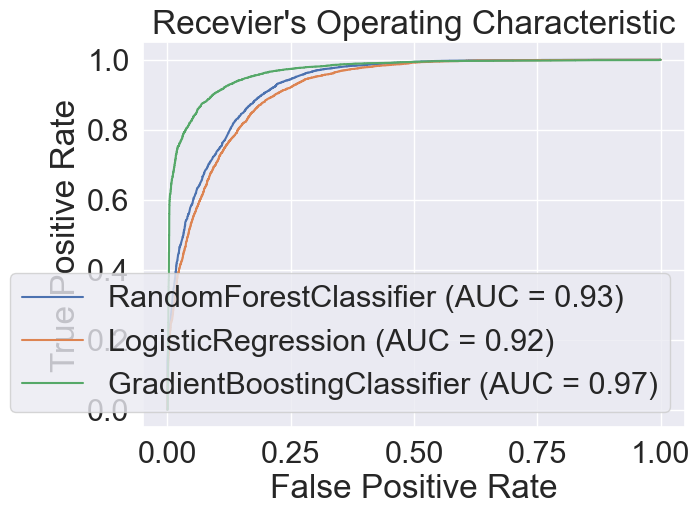

In [429]:
classifiers = [rfc_model,log_model, gbc_model]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, x_test, y_test, ax=ax,)
    plt.rcParams["figure.figsize"] = (5, 5)
    plt.title("Recevier's Operating Characteristic")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    
  
    plt.plot(linestyle='--',color='red')

## We have acheived the score of 92% in Train and 90% in Test with 97% of AUC 

$$ END $$